In [11]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Use numpy to convert to arrays
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
import pmdarima as pm

## pmdarima Requirements

# numpy (1.16.2)
# scipy (1.2.1)
# scikit-learn (0.20.1) 
# pandas (0.23.4
# statsmodels (0.9.0) 
# Cython (0.29.2)
# pmdarima (1.2.1)

In [12]:
# Load the "US_emmissions_by_econ_sector_1990_2017_data.xlsx" Dataset

US_gas_econ_data = pd.read_excel("data/US_emmissions_by_econ_sector_1990_2017_data.xlsx")
US_gas_econ_data.head()

,Year,Transportation,Electricity_generation,Industry,Agriculture,Commercial,Residential,US_territories,Total
0,1990,1527.076528,1875.537005,1628.555710,534.859864,426.928480,344.721770,33.321186,6371.000543
1,1991,1480.932414,1871.567818,1601.087569,534.640267,433.976409,354.286847,39.123871,6315.615194
2,1992,1540.536129,1886.539355,1631.549769,538.743576,429.400668,360.849210,37.315650,6424.934357
3,1993,1577.522681,1962.302414,1604.889269,551.510566,424.556077,372.203143,39.085447,6532.069596
4,1994,1632.154313,1987.102590,1629.785256,543.980445,427.191769,363.141974,41.479440,6624.835787


In [13]:
X = US_gas_econ_data['Year']
Y = np.vstack([US_gas_econ_data['Transportation'], US_gas_econ_data['Electricity_generation'], US_gas_econ_data['Industry'], US_gas_econ_data['Agriculture'], US_gas_econ_data['Commercial'], US_gas_econ_data['Residential'], US_gas_econ_data['US_territories']])

<function matplotlib.pyplot.show(*args, **kw)>

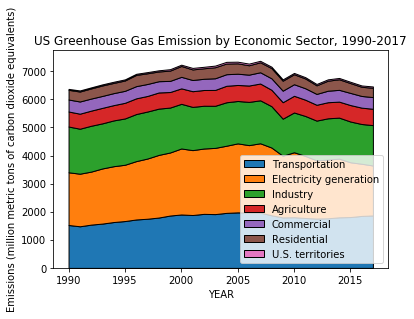

In [14]:
labels = ['Transportation', 'Electricity generation', 'Industry', 'Agriculture', 'Commercial', 'Residential', 'U.S. territories']
plt.stackplot(X, Y, labels=labels, edgecolor='black')
plt.legend(loc=4)

plt.xlabel('YEAR')
plt.ylabel('Emissions (million metric tons of carbon dioxide equivalents)')
plt.title('US Greenhouse Gas Emission by Economic Sector, 1990-2017')

plt.show

In [16]:
# Check if the Transportation series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Transportation_result = adfuller(US_gas_econ_data.Transportation)
print('ADF Statistic: %f' % Transportation_result[0])
print('p-value: %f' % Transportation_result[1])

ADF Statistic: -3.089672
p-value: 0.027327


In [17]:
Transportation_model = pm.auto_arima(US_gas_econ_data.Transportation, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Transportation_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=272.984, BIC=278.016, Fit time=0.041 seconds
Fit ARIMA: order=(0, 2, 0); AIC=274.933, BIC=277.449, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=272.313, BIC=276.087, Fit time=0.021 seconds
Fit ARIMA: order=(0, 2, 1); AIC=270.997, BIC=274.772, Fit time=0.027 seconds
Fit ARIMA: order=(0, 2, 2); AIC=272.985, BIC=278.017, Fit time=0.038 seconds
Fit ARIMA: order=(1, 2, 2); AIC=274.984, BIC=281.274, Fit time=0.062 seconds
Total fit time: 0.202 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -132.499
Method:                       css-mle   S.D. of innovations             39.249
Date:                Fri, 02 Aug 2019   AIC                            270.997
Time:                        00:17:50   BIC                            274.772
Sample:                           

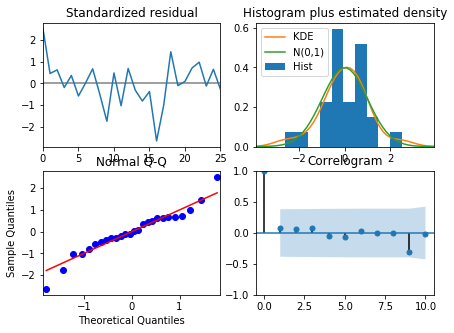

In [18]:
Transportation_model.plot_diagnostics(figsize=(7,5))
plt.show()

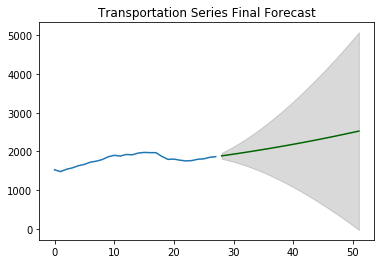

In [19]:
# Transportation Series Forecast
n_periods = 24
fc, confint = Transportation_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Transportation), len(US_gas_econ_data.Transportation)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Transportation Plot
plt.plot(US_gas_econ_data.Transportation)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Transportation Series Final Forecast")
plt.show()

In [21]:
# Check if the Electricity series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Electricity_result = adfuller(US_gas_econ_data.Electricity_generation)
print('ADF Statistic: %f' % Electricity_result[0])
print('p-value: %f' % Electricity_result[1])

ADF Statistic: -2.336024
p-value: 0.160612


In [22]:
Electricity_model = pm.auto_arima(US_gas_econ_data.Electricity_generation, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Electricity_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=303.941, BIC=308.974, Fit time=0.090 seconds
Fit ARIMA: order=(0, 2, 0); AIC=323.201, BIC=325.718, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=316.551, BIC=320.325, Fit time=0.020 seconds
Fit ARIMA: order=(0, 2, 1); AIC=304.002, BIC=307.776, Fit time=0.036 seconds
Fit ARIMA: order=(2, 2, 1); AIC=301.552, BIC=307.842, Fit time=0.041 seconds
Fit ARIMA: order=(2, 2, 0); AIC=301.582, BIC=306.615, Fit time=0.035 seconds
Fit ARIMA: order=(2, 2, 2); AIC=303.316, BIC=310.864, Fit time=0.052 seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 1); AIC=302.337, BIC=309.886, Fit time=0.072 seconds
Total fit time: 0.455 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -145.776
Method:                       css-mle   S.D. of in

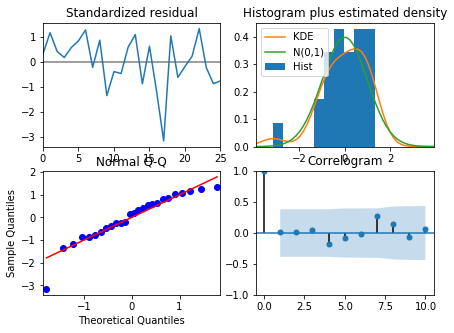

In [23]:
Electricity_model.plot_diagnostics(figsize=(7,5))
plt.show()

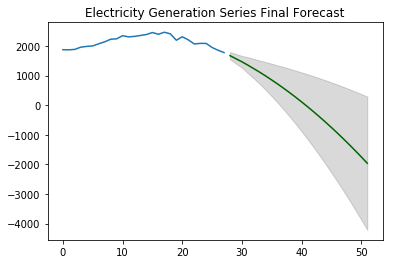

In [24]:
# Electricity Series Forecast
n_periods = 24
fc, confint = Electricity_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Electricity_generation), len(US_gas_econ_data.Electricity_generation)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Electricity Plot
plt.plot(US_gas_econ_data.Electricity_generation)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Electricity Generation Series Final Forecast")
plt.show()

In [25]:
# Check if the Industry series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Industry_result = adfuller(US_gas_econ_data.Industry)
print('ADF Statistic: %f' % Industry_result[0])
print('p-value: %f' % Industry_result[1])

ADF Statistic: -1.258519
p-value: 0.647930


In [26]:
Industry_model = pm.auto_arima(US_gas_econ_data.Industry, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Industry_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=283.532, BIC=288.564, Fit time=0.068 seconds
Fit ARIMA: order=(0, 2, 0); AIC=298.855, BIC=301.371, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=291.364, BIC=295.138, Fit time=0.028 seconds
Fit ARIMA: order=(0, 2, 1); AIC=282.091, BIC=285.865, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=286.093, BIC=292.383, Fit time=0.139 seconds
Total fit time: 0.278 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -138.046
Method:                       css-mle   S.D. of innovations             45.930
Date:                Fri, 02 Aug 2019   AIC                            282.091
Time:                        00:21:24   BIC                            285.865
Sample:                             2   HQIC

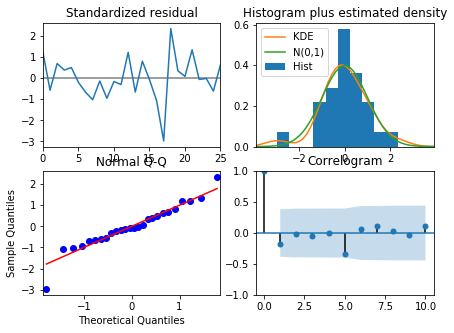

In [27]:
Industry_model.plot_diagnostics(figsize=(7,5))
plt.show()

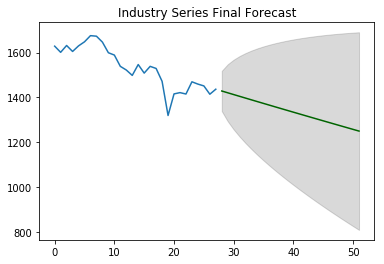

In [22]:
# Industry Series Forecast
n_periods = 24
fc, confint = Industry_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Industry), len(US_gas_econ_data.Industry)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Industry Plot
plt.plot(US_gas_econ_data.Industry)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Industry Series Final Forecast")
plt.show()

In [28]:
# Check if the Agriculture series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Agriculture_result = adfuller(US_gas_econ_data.Agriculture)
print('ADF Statistic: %f' % Agriculture_result[0])
print('p-value: %f' % Agriculture_result[1])

ADF Statistic: -2.212794
p-value: 0.201635


In [29]:
Agriculture_model = pm.auto_arima(US_gas_econ_data.Agriculture, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Agriculture_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=209.447, BIC=214.479, Fit time=0.050 seconds
Fit ARIMA: order=(0, 2, 0); AIC=232.913, BIC=235.429, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=223.530, BIC=227.304, Fit time=0.015 seconds
Fit ARIMA: order=(0, 2, 1); AIC=211.361, BIC=215.135, Fit time=0.018 seconds
Fit ARIMA: order=(2, 2, 1); AIC=209.089, BIC=215.380, Fit time=0.108 seconds
Fit ARIMA: order=(2, 2, 0); AIC=210.154, BIC=215.186, Fit time=0.024 seconds
Fit ARIMA: order=(2, 2, 2); AIC=209.859, BIC=217.407, Fit time=0.068 seconds
Fit ARIMA: order=(3, 2, 2); AIC=211.114, BIC=219.921, Fit time=0.086 seconds
Fit ARIMA: order=(3, 2, 1); AIC=209.266, BIC=216.814, Fit time=0.064 seconds
Total fit time: 0.449 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 -99.545
Method:                       css-mle   

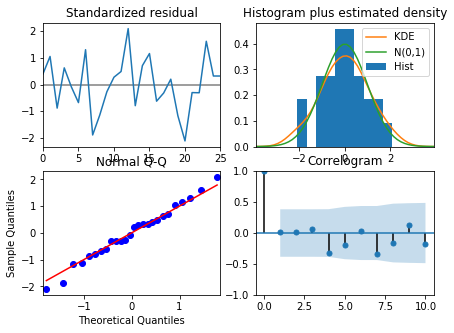

In [30]:
Agriculture_model.plot_diagnostics(figsize=(7,5))
plt.show()

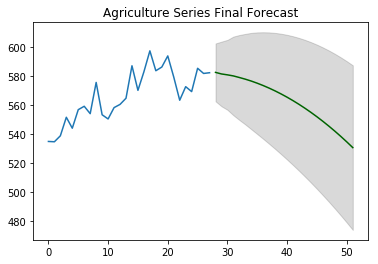

In [31]:
# Agriculture Series Forecast
n_periods = 24
fc, confint = Agriculture_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Agriculture), len(US_gas_econ_data.Agriculture)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Agriculture Plot
plt.plot(US_gas_econ_data.Agriculture)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Agriculture Series Final Forecast")
plt.show()

In [32]:
# Check if the Commercial series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Commercial_result = adfuller(US_gas_econ_data.Commercial)
print('ADF Statistic: %f' % Commercial_result[0])
print('p-value: %f' % Commercial_result[1])

ADF Statistic: -2.461564
p-value: 0.125109


In [33]:
Commercial_model = pm.auto_arima(US_gas_econ_data.Commercial, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Commercial_model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=212.332, BIC=214.924, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=214.278, BIC=218.165, Fit time=0.022 seconds
Fit ARIMA: order=(0, 1, 1); AIC=214.105, BIC=217.992, Fit time=0.053 seconds
Total fit time: 0.099 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -104.166
Method:                           css   S.D. of innovations             11.462
Date:                Fri, 02 Aug 2019   AIC                            212.332
Time:                        00:47:48   BIC                            214.924
Sample:                             1   HQIC                           213.103
                                                                              
                 coef    std err        

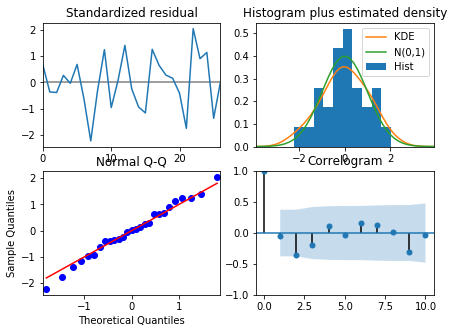

In [34]:
Commercial_model.plot_diagnostics(figsize=(7,5))
plt.show()

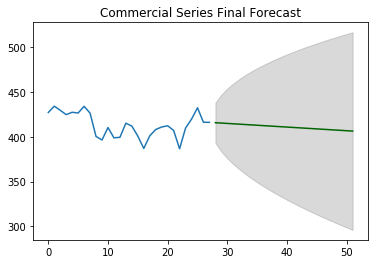

In [35]:
# Commercial Series Forecast
n_periods = 24
fc, confint = Commercial_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Commercial), len(US_gas_econ_data.Commercial)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Commercial Plot
plt.plot(US_gas_econ_data.Commercial)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Commercial Series Final Forecast")
plt.show()

In [36]:
# Check if the Residential series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Residential_result = adfuller(US_gas_econ_data.Residential)
print('ADF Statistic: %f' % Residential_result[0])
print('p-value: %f' % Residential_result[1])

ADF Statistic: -2.973704
p-value: 0.037424


In [37]:
Residential_model = pm.auto_arima(US_gas_econ_data.Residential, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Residential_model.summary())

Fit ARIMA: order=(1, 1, 1); AIC=242.929, BIC=248.113, Fit time=0.045 seconds
Fit ARIMA: order=(0, 1, 0); AIC=246.163, BIC=248.755, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=247.711, BIC=251.598, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1); AIC=243.363, BIC=247.251, Fit time=0.017 seconds
Fit ARIMA: order=(2, 1, 1); AIC=240.414, BIC=246.893, Fit time=0.040 seconds
Fit ARIMA: order=(2, 1, 0); AIC=240.438, BIC=245.621, Fit time=0.025 seconds
Fit ARIMA: order=(2, 1, 2); AIC=242.351, BIC=250.126, Fit time=0.050 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=0.062 seconds
Fit ARIMA: order=(3, 1, 1); AIC=242.293, BIC=250.068, Fit time=0.081 seconds
Total fit time: 0.364 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   27
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -115.207
Method:                       css-mle   S.D. of 

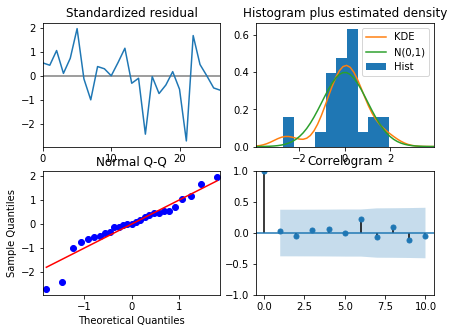

In [38]:
Residential_model.plot_diagnostics(figsize=(7,5))
plt.show()

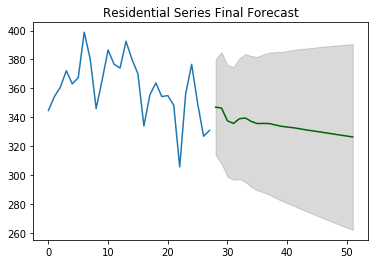

In [39]:
# Residential Series Forecast
n_periods = 24
fc, confint = Residential_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Residential), len(US_gas_econ_data.Residential)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Residential Plot
plt.plot(US_gas_econ_data.Residential)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Residential Series Final Forecast")
plt.show()

In [40]:
# Check if the US_territories series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
US_territories_result = adfuller(US_gas_econ_data.US_territories)
print('ADF Statistic: %f' % US_territories_result[0])
print('p-value: %f' % US_territories_result[1])

ADF Statistic: -2.392015
p-value: 0.144003


In [41]:
US_territories_model = pm.auto_arima(US_gas_econ_data.US_territories, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(US_territories_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=141.479, BIC=146.511, Fit time=0.037 seconds
Fit ARIMA: order=(0, 2, 0); AIC=162.983, BIC=165.499, Fit time=0.006 seconds
Fit ARIMA: order=(1, 2, 0); AIC=141.284, BIC=145.058, Fit time=0.015 seconds
Fit ARIMA: order=(0, 2, 1); AIC=143.451, BIC=147.225, Fit time=0.047 seconds
Fit ARIMA: order=(2, 2, 0); AIC=140.815, BIC=145.848, Fit time=0.023 seconds
Fit ARIMA: order=(2, 2, 1); AIC=141.756, BIC=148.046, Fit time=0.045 seconds
Fit ARIMA: order=(3, 2, 1); AIC=143.573, BIC=151.121, Fit time=0.049 seconds
Fit ARIMA: order=(3, 2, 0); AIC=141.940, BIC=148.230, Fit time=0.031 seconds
Total fit time: 0.263 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(2, 2, 0)   Log Likelihood                 -66.408
Method:                       css-mle   S.D. of innovations              3.042
Date:                Fri, 02 Aug 2019 

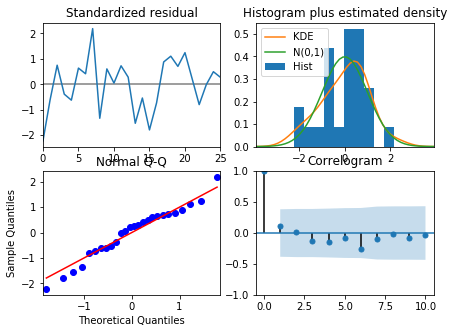

In [42]:
US_territories_model.plot_diagnostics(figsize=(7,5))
plt.show()

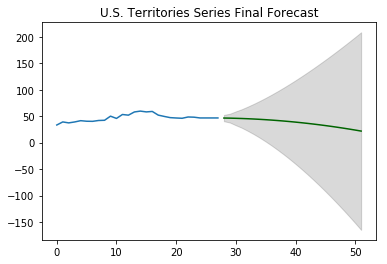

In [43]:
# US_territories Series Forecast
n_periods = 24
fc, confint = US_territories_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.US_territories), len(US_gas_econ_data.US_territories)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# US_territories Plot
plt.plot(US_gas_econ_data.US_territories)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("U.S. Territories Series Final Forecast")
plt.show()

In [45]:
# Check if the Total series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.
Total_result = adfuller(US_gas_econ_data.Total)
print('ADF Statistic: %f' % Total_result[0])
print('p-value: %f' % Total_result[1])

ADF Statistic: -2.660969
p-value: 0.081039


In [46]:
Total_model = pm.auto_arima(US_gas_econ_data.Total, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(Total_model.summary())

Fit ARIMA: order=(1, 2, 1); AIC=341.506, BIC=346.538, Fit time=0.059 seconds
Fit ARIMA: order=(0, 2, 0); AIC=357.537, BIC=360.053, Fit time=0.003 seconds
Fit ARIMA: order=(1, 2, 0); AIC=353.959, BIC=357.733, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 1); AIC=340.406, BIC=344.180, Fit time=0.036 seconds
Fit ARIMA: order=(0, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.153 seconds
                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -167.203
Method:                       css-mle   S.D. of innovations            140.978
Date:                Fri, 02 Aug 2019   AIC                            340.406
Time:                        00:54:18   BIC                            344.180
Sample:                             2   HQIC          

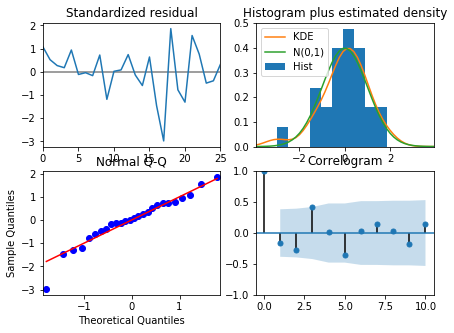

In [47]:
Total_model.plot_diagnostics(figsize=(7,5))
plt.show()

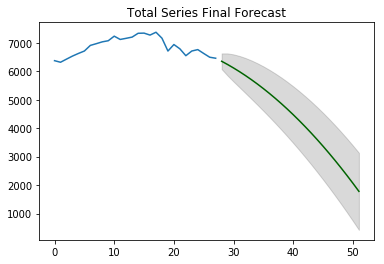

In [48]:
# Total Series Forecast
n_periods = 24
fc, confint = Total_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(US_gas_econ_data.Total), len(US_gas_econ_data.Total)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Total Plot
plt.plot(US_gas_econ_data.Total)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Total Series Final Forecast")
plt.show()